In [1]:
# Libraries

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt 

# seaborn
import seaborn as sns

# numpy
import numpy as np

# Requests
import requests

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# API key for OpenWeatherMap
owm_api_key = "650f4e9ae8de0f2259ff7ff657967de5"

# OWM base URL
owm_base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
# Reading the dataset

crop_df = pd.read_csv('Datasets/best_crop.csv')
crop_df.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Crop
0,Gujarat,36,24,41,24.944676,94.257027,7.009180,Anar
1,Gujarat,40,29,42,24.632287,89.015745,7.104095,Anar
2,Gujarat,0,17,42,23.202426,91.194427,6.859841,Anar
3,Gujarat,6,18,37,19.656901,89.937010,5.937650,Anar
4,Gujarat,32,13,42,23.501282,92.975275,5.786058,Anar


In [4]:
# shape of dataset - checking the no. of rows and columns

crop_df.shape

(1765, 8)

In [5]:
# checking for null values

crop_df.isnull().sum()

State           0
Nitrogen        0
Phosphorous     0
Potassium       0
Temperature     0
Humidity        0
pH              0
Crop            0
dtype: int64

In [6]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1765 non-null   object 
 1   Nitrogen      1765 non-null   int64  
 2   Phosphorous   1765 non-null   int64  
 3   Potassium     1765 non-null   int64  
 4   Temperature   1765 non-null   float64
 5   Humidity      1765 non-null   float64
 6   pH            1765 non-null   float64
 7   Crop          1765 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 110.4+ KB


In [7]:
# convert object data to int data

# State
unq_state = list(set(crop_df['State']))
dictOfWords_state = { unq_state[i] : i for i in range(len(unq_state)) }
crop_df['State'] = crop_df['State'].map(dictOfWords_state)

# Crop
unq_crop = list(set(crop_df['Crop']))
dictOfWords_crop = { unq_crop[i] : i for i in range(len(unq_crop)) }
crop_df['Crop'] = crop_df['Crop'].map(dictOfWords_crop)

In [8]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1765 non-null   int64  
 1   Nitrogen      1765 non-null   int64  
 2   Phosphorous   1765 non-null   int64  
 3   Potassium     1765 non-null   int64  
 4   Temperature   1765 non-null   float64
 5   Humidity      1765 non-null   float64
 6   pH            1765 non-null   float64
 7   Crop          1765 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 110.4 KB


In [9]:
crop_df.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Crop
0,19,36,24,41,24.944676,94.257027,7.009180,16
1,19,40,29,42,24.632287,89.015745,7.104095,16
2,19,0,17,42,23.202426,91.194427,6.859841,16
3,19,6,18,37,19.656901,89.937010,5.937650,16
4,19,32,13,42,23.501282,92.975275,5.786058,16


In [10]:
# Separate independent and dependent columns

x = crop_df.drop(['Crop'], axis=1)
y = crop_df[['Crop']]

In [11]:
x.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH
0,19,36,24,41,24.944676,94.257027,7.009180
1,19,40,29,42,24.632287,89.015745,7.104095
2,19,0,17,42,23.202426,91.194427,6.859841
3,19,6,18,37,19.656901,89.937010,5.937650
4,19,32,13,42,23.501282,92.975275,5.786058


In [12]:
y.head()

,Crop
0,16
1,16
2,16
3,16
4,16


In [13]:
# Split data into train and test data

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2)

In [14]:
Xtrain.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH
678,19,130,59,19,25.072787,82.502579,6.520404
309,19,117,76,47,25.562022,77.382290,6.119216
464,2,32,71,85,20.627675,14.440089,6.403982
304,19,117,86,53,25.196402,83.558299,5.703382
1090,21,2,36,31,30.902252,49.959555,5.731719


In [15]:
Xtest.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH
437,20,22,72,85,18.868056,15.658092,6.391174
922,9,84,40,43,25.011576,88.331302,7.228268
1501,5,56,50,52,33.087061,92.251975,6.770385
1427,18,6,9,12,31.083689,90.143626,7.028746
1340,14,6,48,24,28.636281,84.614311,6.790736


In [16]:
Ytrain.head()

,Crop
678,8
309,4
464,14
304,4
1090,11


In [17]:
Ytest.head()

,Crop
437,14
922,13
1501,15
1427,12
1340,0


In [18]:
# Feature Scaling

scalar = StandardScaler()
Xtrain = scalar.fit_transform(Xtrain)
Xtest = scalar.transform(Xtest)

In [19]:
# Build Classification Model

models = {
    DecisionTreeClassifier():'Decision Tree',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}

for m in models.keys():
    m.fit(Xtrain,Ytrain.values.ravel())

for model,name in models.items():
    print(f"Accuracy Score for {name} is : ",model.score(Xtest,Ytest)*100,"%")

Accuracy Score for Decision Tree is :  95.75070821529745 %
Accuracy Score for Random Forest is :  98.01699716713881 %
Accuracy Score for Support Vector Machine is :  93.76770538243626 %


In [20]:
# Random Forest gives the highest accuracy

rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain.values.ravel())

RandomForestClassifier()

In [21]:
# Testing with user input

State = input("Enter State: ")
City = input("Enter City/Town: ")
N = float(input("Enter amount of Nitrogen in soil: "))
P = float(input("Enter amount of Phosphorous in soil: "))
K = float(input("Enter amount of Potassium in soil: "))
pH = float(input("Enter pH level of soil: "))


# OWM URL
owm_url = owm_base_url + "appid=" + owm_api_key + "&q=" + City

response = requests.get(owm_url)
x = response.json()

y = x["main"]

Temp = float(y["temp"]) - 273.15
Hum = float(y["humidity"])

State = dictOfWords_state[State]

user_input = [[State, N, P, K, Temp, Hum, pH]]

sc = StandardScaler()
sc.fit(user_input)
user_input = scalar.transform(user_input)

op = rfc.predict(user_input)

crop = [k for k, v in dictOfWords_crop.items() if v == op[0]][0]

print("\nThe best crop for the given conditions would be: ",crop)

Enter State: Maharashtra
Enter City/Town: Navi Mumbai
Enter amount of Nitrogen in soil: 12
Enter amount of Phosphorous in soil: 19
Enter amount of Potassium in soil: 31
Enter pH level of soil: 5.57

The best crop for the given conditions would be:  Mango


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Predicting the Price for the best crop predicted above

In [23]:
# Reading the Dataset

crop_price_df = pd.read_csv('Datasets/Price/'+crop+'.csv')
crop_price_df.head()

,State,Market,Date,Month,Year,Price
0,Andhra Pradesh,Chittoor,22-05-2021,5,2021,2000
1,Andhra Pradesh,Chittoor,23-05-2021,5,2021,2000
2,Andhra Pradesh,Chittoor,24-05-2021,5,2021,2000
3,Andhra Pradesh,Chittoor,25-05-2021,5,2021,2000
4,Andhra Pradesh,Chittoor,26-05-2021,5,2021,1900


In [24]:
# Shape of Dataset - checking the no. of rows and columns

crop_price_df.shape

(39739, 6)

In [25]:
# Checking for Null Values

crop_df.isnull().sum()

State           0
Nitrogen        0
Phosphorous     0
Potassium       0
Temperature     0
Humidity        0
pH              0
Crop            0
dtype: int64

<Axes: >

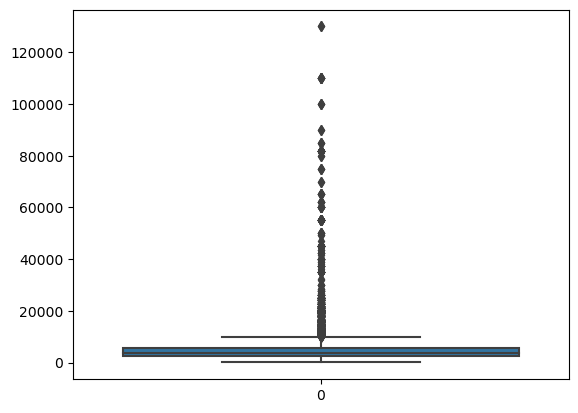

In [26]:
# Plotting a box plot to check for outliers

sns.boxplot(crop_price_df['Price'])

In [27]:
# Outlier Removal

# IQR - interquartile range - the range of values that resides in the middle of the scores

Q1 = np.percentile(crop_price_df['Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(crop_price_df['Price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

# upper bound
upper = np.where(crop_price_df['Price'] >= (Q3 + 1.5*IQR))

# lower bound
lower = np.where(crop_price_df['Price'] <= (Q1 - 1.5*IQR))

# Removing the outliers, i.e., the upper and lower bounds
crop_price_df.drop(upper[0], inplace = True)
crop_price_df.drop(lower[0], inplace = True)

C:\Users\Jaskaran\AppData\Local\Temp\ipykernel_11424\4103001924.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(crop_price_df['Price'], 25, interpolation = 'midpoint')
C:\Users\Jaskaran\AppData\Local\Temp\ipykernel_11424\4103001924.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(crop_price_df['Price'], 75, interpolation = 'midpoint')


In [28]:
# Checking the new shape of dataset

crop_price_df.shape

(38125, 6)

<Axes: >

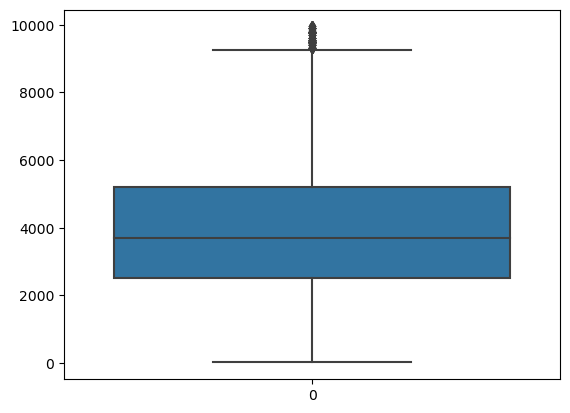

In [29]:
sns.boxplot(crop_price_df['Price'])

In [30]:
crop_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38125 entries, 0 to 39738
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   38125 non-null  object
 1   Market  38125 non-null  object
 2   Date    38125 non-null  object
 3   Month   38125 non-null  int64 
 4   Year    38125 non-null  int64 
 5   Price   38125 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


In [31]:
# convert necessary object data to int data

# State - Price Data Frame (pdf)
unq_state_pdf = list(set(crop_price_df['State']))
dictOfWords_state_pdf = { unq_state_pdf[i] : i for i in range(len(unq_state_pdf)) }
crop_price_df['State'] = crop_price_df['State'].map(dictOfWords_state_pdf)

# Market
unq_market_pdf = list(set(crop_price_df['Market']))
dictOfWords_market_pdf = { unq_market_pdf[i] : i for i in range(len(unq_market_pdf)) }
crop_price_df['Market'] = crop_price_df['Market'].map(dictOfWords_market_pdf)

In [32]:
crop_price_df.head()

,State,Market,Date,Month,Year,Price
0,22,235,22-05-2021,5,2021,2000
1,22,235,23-05-2021,5,2021,2000
2,22,235,24-05-2021,5,2021,2000
3,22,235,25-05-2021,5,2021,2000
4,22,235,26-05-2021,5,2021,1900


In [33]:
# Separate independent and dependent columns

X = crop_price_df[['State', 'Market', 'Month', 'Year']]
Y = crop_price_df[['Price']]

In [34]:
X.head()

,State,Market,Month,Year
0,22,235,5,2021
1,22,235,5,2021
2,22,235,5,2021
3,22,235,5,2021
4,22,235,5,2021


In [35]:
Y.head()

,Price
0,2000
1,2000
2,2000
3,2000
4,1900


In [36]:
# Split data into train and test data

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

In [37]:
# Build Regression Model

models = {
    LinearRegression():'Linear Regression',
    RandomForestRegressor():'Random Forest Regressor',
    GradientBoostingRegressor():'Gradient Boosting Regressor',
}

for m in models.keys():
    m.fit(X_train,Y_train.values.ravel())

for model,name in models.items():
    print(f"Accuracy Score for {name} is : ",model.score(X_test,Y_test)*100,"%")

Accuracy Score for Linear Regression is :  7.978557265788744 %
Accuracy Score for Random Forest Regressor is :  77.97522038516786 %
Accuracy Score for Gradient Boosting Regressor is :  54.59821658132413 %


In [38]:
# Random Forest Regressor gives the best accuracy

rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train.values.ravel())

RandomForestRegressor()

In [41]:
# Testing with user input

State_pdf = [k for k, v in dictOfWords_state.items() if v == State][0]
Market = input("Enter the name of the Market: ")
Month = int(input("Enter the Month: "))
Year = int(input("Enter the Year: "))

State_pdf = dictOfWords_state_pdf[State_pdf]
Market = dictOfWords_market_pdf[Market]

user_input = [[State_pdf,Market,Month,Year]]

predicted_price = rfr.predict(user_input)[0]
predicted_price = round(predicted_price, 2)

print("\nPredicted Price = Rs.", predicted_price, "per Quintal")

Enter the name of the Market: Nasik
Enter the Month: 3
Enter the Year: 2024

Predicted Price = Rs. 8560.64 per Quintal


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
